In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Up

In [7]:
# LOAD RESULTS
res_p = '/Users/harveyaa/Documents/masters/neuropsych_mtl/ML/benchmark_3/results.csv'
out_p = '.'

single_p = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/baseline/'

In [8]:
clfs = ['LR','SVC','Ridge']#,'GNB','RF','kNN']
#cases = ['DEL15q11_2','DUP1q21_1','DEL1q21_1','DUP22q11_2','DUP16p11_2','DEL16p11_2','DEL22q11_2','ADHD','ASD','SZ','BIP']
#case_labels = ['DEL 15q11.2','DUP 1q21.1','DEL 1q21.1','DUP 22q11.2','DUP 16p11.2','DEL 16p11.2','DEL 22q11.2','ADHD','ASD','SZ','BIP']

# Ordered by effect size
cases = ['DEL15q11_2','DUP22q11_2','DUP16p11_2','DEL1q21_1','DUP1q21_1','DEL16p11_2','DEL22q11_2','ADHD','ASD','SZ','BIP']
case_labels = ['DEL 15q11.2','DUP 22q11.2','DUP 16p11.2','DEL 1q21.1','DUP 1q21.1','DEL 16p11.2','DEL 22q11.2','ADHD','ASD','SZ','BIP']

In [47]:
case_labels =       ['BIP                  n=44',
                    'SZ                   n=283',
                    'ASD                 n=472',
                    'ADHD              n=223',

                    'DEL 22q11.2     n=43',
                    'DEL 16p11.2      n=32',
                    'DUP 1q21.1       n=19',
                    'DEL 1q21.1       n=25',
                    'DUP 16p11.2     n=35',
                    'DUP 22q11.2     n=22',
                    'DEL 15q11.2    n=103']
case_labels.reverse()

In [48]:
# Load ML results
results = pd.read_csv(res_p,index_col=0,header=[0,1])
results = 100*results

In [49]:
results

LR                   SVC                 Ridge             \
                 conf       conn       conf       conn       conf       conn   
SZ          59.095719  77.908465  62.231791  76.183563  60.195620  74.923720   
ASD         47.834065  61.514691  47.194641  60.345604  49.423055  59.707306   
BIP         66.834677  79.616935  72.600806  78.346774  70.060484  74.516129   
ADHD        67.191904  54.505247  63.193403  54.325337  66.844078  52.938531   
DEL22q11_2  59.346405  87.254902  68.627451  87.254902  64.052288  87.320261   
DUP22q11_2  28.888889  43.333333  24.444444  41.111111  28.888889  41.111111   
DEL16p11_2  54.871795  74.871795  53.205128  71.794872  54.871795  74.871795   
DUP16p11_2  27.142857  71.428571  40.000000  71.428571  32.857143  77.142857   
DEL1q21_1   46.000000  68.000000  44.000000  72.000000  42.000000  70.000000   
DUP1q21_1   26.428571  60.357143  47.857143  66.071429  28.928571  66.071429   
DEL15q11_2  51.916376  58.757259  55.296167  58.281069  56.260163  62.160279   

                  GNB                    RF                   kNN             
                 conf       conn       conf       conn       conf       conn  
SZ          58.464567  61.446850  60.824311  69.296260  55.958415  61.914370  
ASD         47.723179  54.401666  50.166610  58.221322  49.315547  51.641337  
BIP         72.580645  62.500000  75.181452  71.955645  64.979839  67.560484  
ADHD        65.106447  52.592204  67.352324  61.107946  63.368816  55.020990  
DEL22q11_2  67.516340  62.941176  62.941176  69.869281  53.529412  59.281046  
DUP22q11_2  47.222222  49.166667  36.111111  42.777778  41.111111  48.055556  
DEL16p11_2  34.615385  57.820513  57.948718  56.153846  57.948718  65.897436  
DUP16p11_2  44.285714  54.285714  41.428571  51.428571  44.285714  52.857143  
DEL1q21_1   30.000000  52.000000  28.000000  56.000000  40.000000  54.000000  
DUP1q21_1   47.500000  68.928571  48.214286  63.571429  52.857143  56.428571  
DEL15q11_2  50.511034  55.795587  52.903600  55.795587  52.903600  54.854820

In [60]:
# Load MTL results
models = ['mlp','deeper','cnn','concat','mps_big']

results_single = []
for model in models:
    accuracy = {}
    for case in cases:
        folds = []
        for fold in range(5):
            p = os.path.join(single_p,f'{model}/{case}/fold_{fold}')
            file = [f for f in os.listdir(p) if f[-4:]=='.csv'][0]
            folds.append(pd.read_csv(os.path.join(p,file),index_col=0,header=[0,1])[case]['Accuracy/test'].loc[99])
        accuracy[case]=np.mean(folds)
    results_single.append(pd.DataFrame(accuracy,index=[model]))

results_single = pd.concat(results_single).transpose()

In [61]:
results_single

,mlp,deeper,cnn,concat,mps_big
DEL15q11_2,54.378630,53.391405,57.781649,54.854820,54.854820
DUP22q11_2,41.388889,45.833333,48.333333,36.666667,45.833333
DUP16p11_2,64.285714,62.857143,71.428571,68.571429,61.428571
DEL1q21_1,70.000000,72.000000,66.000000,66.000000,76.000000
DUP1q21_1,53.214286,58.571429,63.571429,56.071429,50.357143
DEL16p11_2,73.461538,73.461538,76.538462,70.384615,71.923077
DEL22q11_2,84.967320,81.568627,86.078431,89.607843,85.032680
ADHD,55.206897,54.850075,55.029985,56.769115,54.848576
ASD,61.085219,61.931780,60.873016,62.780029,61.614319
SZ,75.709892,75.558563,78.069636,76.494833,75.872293


# Benchmark Plot

In [62]:
##################
# BENCHMARK PLOT #
##################
"""
title = 'Connectomes vs Confounds - Intrasite CV'

fig,ax = plt.subplots(1,len(cases),figsize=(11,5),sharey=True,sharex=True)

plt.yticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,74,80,85,90,95,100])
ax[0].set_yticklabels([0,None,10,None,20,None,30,None,40,None,50,None,60,None,70,None,80,None,90,None,100])

sns.set_style('whitegrid')
colors = ['navy','darkorchid','red','orange','dodgerblue','forestgreen']
for j,case in enumerate(cases):
    for i,clf in enumerate(clfs):
        conf_acc = results[clf].loc[case,'conf']
        conn_acc = results[clf].loc[case,'conn']

        if conf_acc > conn_acc:
            mfc = 'white'
            ls =''
        else:
            mfc = colors[i]
            ls = '-'
        ax[j].plot(i,conn_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
        ax[j].plot(i,conf_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
        ax[j].plot((i,i),(conf_acc,conn_acc),color=colors[i],ls=ls,label=clf)
        ax[j].set_xticklabels([])
        ax[j].set_xticks([])
        ax[j].set_xlim(-0.75,5.75)

        ax[j].set_xlabel(case_labels[j],rotation=270)

        lines = ax[j].get_ygridlines()
        b = lines[10]
        b.set_color('black')
        b.set_linewidth(1.15)
        b.set_linestyle('--')

handles, _ = ax[0].get_legend_handles_labels()
labels = clfs

ax[0].set_ylabel('Accuracy')
fig.legend(handles, labels, loc=(0.065,0.67))
plt.suptitle(title)
plt.ylim(20,95)
plt.tight_layout(pad=0.5)
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join(out_p,'benchmark.png'),dpi=300)
"""

"\ntitle = 'Connectomes vs Confounds - Intrasite CV'\n\nfig,ax = plt.subplots(1,len(cases),figsize=(11,5),sharey=True,sharex=True)\n\nplt.yticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,74,80,85,90,95,100])\nax[0].set_yticklabels([0,None,10,None,20,None,30,None,40,None,50,None,60,None,70,None,80,None,90,None,100])\n\nsns.set_style('whitegrid')\ncolors = ['navy','darkorchid','red','orange','dodgerblue','forestgreen']\nfor j,case in enumerate(cases):\n    for i,clf in enumerate(clfs):\n        conf_acc = results[clf].loc[case,'conf']\n        conn_acc = results[clf].loc[case,'conn']\n\n        if conf_acc > conn_acc:\n            mfc = 'white'\n            ls =''\n        else:\n            mfc = colors[i]\n            ls = '-'\n        ax[j].plot(i,conn_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)\n        ax[j].plot(i,conf_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)\n        ax[j].plot((i,i),(conf_acc,conn_acc),color=colors[i],ls=ls,label=clf)\n        ax[j]

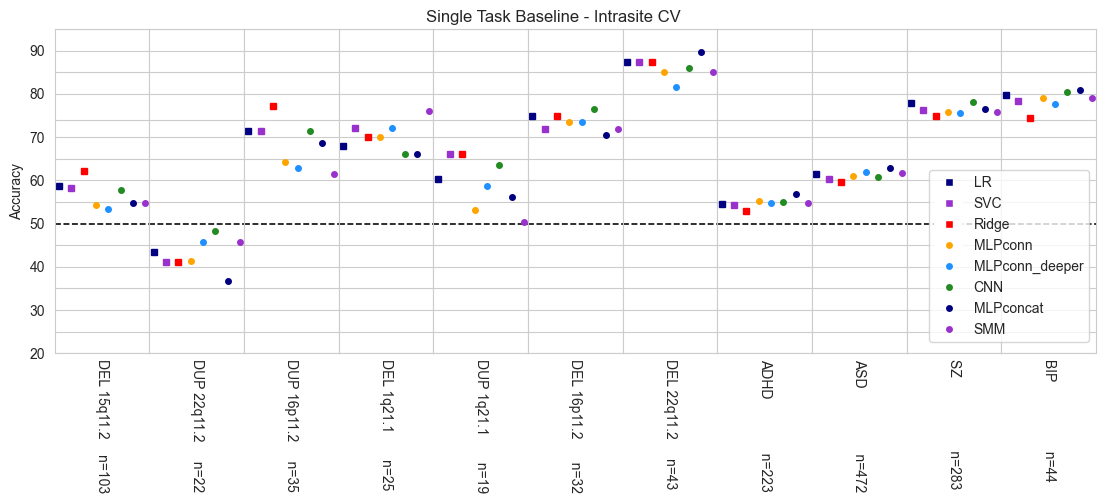

In [93]:
##################
# BENCHMARK PLOT #
##################
title = 'Single Task Baseline - Intrasite CV'

fig,ax = plt.subplots(1,len(cases),figsize=(11,5),sharey=True,sharex=True)

plt.yticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,74,80,85,90,95,100])
ax[0].set_yticklabels([0,None,10,None,20,None,30,None,40,None,50,None,60,None,70,None,80,None,90,None,100])

sns.set_style('whitegrid')
colors = ['navy','darkorchid','red','orange','dodgerblue','forestgreen','navy','darkorchid','red']
for j,case in enumerate(cases):
    for i,clf in enumerate(clfs + models):
        #conf_acc = results[clf].loc[case,'conf']
        if clf in clfs:
            conn_acc = results[clf].loc[case,'conn']
            marker='s'
        else:
            conn_acc = results_single[clf].loc[case]
            marker='o'

        mfc = colors[i]
        ax[j].plot(i,conn_acc,marker=marker,color=colors[i],ms=4,markerfacecolor=mfc)
        #ax[j].plot(i,conf_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
        #ax[j].plot((i,i),(conf_acc,conn_acc),color=colors[i],ls=ls,label=clf)
        ax[j].set_xticklabels([])
        ax[j].set_xticks([])
        #ax[j].set_xlim(-0.75,5.75)

        ax[j].set_xlabel(case_labels[j],rotation=270)

        lines = ax[j].get_ygridlines()
        b = lines[10]
        b.set_color('black')
        b.set_linewidth(1.15)
        b.set_linestyle('--')

from matplotlib.lines import Line2D
handles = [Line2D([0], [0], marker='s',color='w', label='LR',
                          markerfacecolor=colors[0]),
        Line2D([0], [0], marker='s', color='w', label='SVC',
                          markerfacecolor=colors[1]),
        Line2D([0], [0], marker='s', color='w', label='Ridge',
                          markerfacecolor=colors[2]),
        Line2D([0], [0], marker='o', color='w', label='MLPconn',
                          markerfacecolor=colors[3]),
        Line2D([0], [0], marker='o', color='w', label='MLPconn_deeper',
                          markerfacecolor=colors[4]),
        Line2D([0], [0], marker='o', color='w', label='CNN',
                          markerfacecolor=colors[5]),
        Line2D([0], [0], marker='o', color='w', label='MLPconcat',
                          markerfacecolor=colors[6]),
        Line2D([0], [0], marker='o', color='w', label='SMM',
                          markerfacecolor=colors[7]),
                          ]
labels = ['LR','SVC','Ridge','MLPconn','MLPconn_deeper','CNN','MLPconcat','SMM']
fig.legend(handles, labels, loc=(0.84,0.32))

handles, _ = ax[0].get_legend_handles_labels()
labels = clfs + models

ax[0].set_ylabel('Accuracy')
#fig.legend(handles, labels, loc='lower right')
plt.suptitle(title)
plt.ylim(20,95)
plt.tight_layout(pad=0.5)
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join(out_p,'baseline.png'),dpi=300)